{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 18000, 'height': 18000, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.0002777777777777778, 0.0, 44.999861100000004,
       0.0, -0.0002777777777777778, 50.000138899999996), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


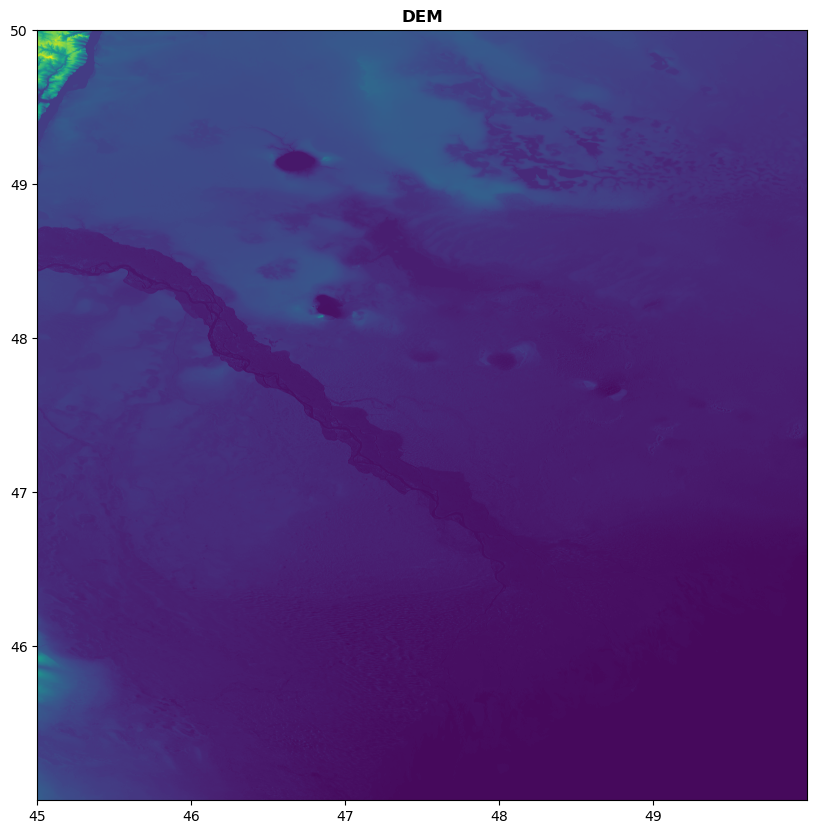

In [6]:
   import requests
   import rasterio
   from rasterio.plot import show
   import matplotlib.pyplot as plt

   # URL API
   url = "https://portal.opentopography.org/API/globaldem"
   
   # Parametry zapytania
   params = {
       "demtype": "COP30",
       "south": 45,
       "north": 50,
       "west": 45,
       "east": 50,
       "outputFormat": "GTiff",
       "API_Key": "demoapikeyot2022"
   }

   # Wykonaj zapytanie GET
   response = requests.get(url, params=params)

   # Sprawdź czy zapytanie powiodło się
   if response.status_code == 200:
       # Zapisz pobrany GeoTIFF do pliku
       with open("output.tif", "wb") as f:
           f.write(response.content)

       # Otwórz plik GeoTIFF z rasterio
       with rasterio.open("output.tif") as src:
           print(src.profile)
           # Wyświetl obraz
           fig, ax = plt.subplots(figsize=(10, 10))
           show(src, ax=ax, title="DEM")
           plt.show()
   else:
       print(f"Błąd pobierania danych: {response.status_code}, {response.text}")
   